In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# A549

In [11]:
A549_rep5_run1 = pd.read_csv("../data/aws_predictions/A549_rep5_run1_prediction.csv")
A549_rep6_run1 = pd.read_csv("../data/aws_predictions/A549_rep6_run1_prediction.csv")

In [12]:
merge1 = A549_rep5_run1.merge(A549_rep6_run1, on = ['transcript','position'], how = 'inner')

In [14]:
merge1['mean_scores'] = merge1[['score_x', 'score_y']].mean(axis=1)

In [15]:
merge1["pred_mean"] = merge1.mean_scores.map(lambda x:1 if x>=0.35 else 0)

In [16]:
merge1.head()

,transcript,position,score_x,score_y,mean_scores,pred_mean
0,ENST00000373020,1006,0.004545,0.031818,0.018182,0
1,ENST00000373020,1013,0.009091,0.009091,0.009091,0
2,ENST00000373020,1149,0.004545,0.000000,0.002273,0
3,ENST00000373020,512,0.013636,0.036364,0.025000,0
4,ENST00000373020,689,0.004545,0.027273,0.015909,0


In [17]:
list(merge1["pred_mean"].value_counts())

[115580, 3782]

In [27]:
ind = ["0", "1"]
plot_df = pd.DataFrame(list(merge1["pred_mean"].value_counts()), columns = ["A549"], index = ind)
plot_df

,A549
0,115580
1,3782


# HCT116

In [28]:
Hct116_rep3_run1 = pd.read_csv("../data/aws_predictions/Hct116_rep3_run1_prediction.csv")
Hct116_rep3_run4 = pd.read_csv("../data/aws_predictions/Hct116_rep3_run4_prediction.csv")
Hct116_rep4_run3 = pd.read_csv("../data/aws_predictions/hct116_rep4_run3_prediction.csv")

In [29]:
mergeHct1 = Hct116_rep3_run1.merge(Hct116_rep3_run4, on = ['transcript','position'],how='inner')
mergeHct2 = mergeHct1.merge(Hct116_rep4_run3, on = ['transcript','position'],how='inner')

In [30]:
mergeHct2 = mergeHct2.rename({'score':'score_z'},axis=1)

In [31]:
mergeHct2['mean_scores'] = mergeHct2[['score_x', 'score_y','score_z']].mean(axis=1)

In [32]:
mergeHct2["pred_mean"] = mergeHct2.mean_scores.map(lambda x:1 if x>=0.35 else 0)

In [33]:
plot_df["HCT116"] = list(mergeHct2["pred_mean"].value_counts())
plot_df

,A549,HCT116
0,115580,116832
1,3782,5006


# HEPG2

In [34]:
hepG2_rep5_run2 = pd.read_csv("../data/aws_predictions/hepG2_rep5_run2_prediction.csv")
hepG2_rep6_run1 = pd.read_csv("../data/aws_predictions/hepG2_rep6_run1_prediction.csv")

In [35]:
mergeG2 = hepG2_rep5_run2.merge(hepG2_rep6_run1, on = ['transcript','position'],how='inner')

In [36]:
mergeG2['mean_scores'] = mergeG2[['score_x', 'score_y']].mean(axis=1)

In [37]:
mergeG2["pred_mean"] = mergeG2.mean_scores.map(lambda x:1 if x>=0.35 else 0)

In [38]:
plot_df["HEPG2"] = list(mergeG2["pred_mean"].value_counts())
plot_df

,A549,HCT116,HEPG2
0,115580,116832,115012
1,3782,5006,3889


# K562

In [39]:
k562_rep4_run1 = pd.read_csv("../data/aws_predictions/k562_rep4_run1_prediction.csv")
k562_rep5_run1 = pd.read_csv("../data/aws_predictions/k562_rep5_run1_prediction.csv")
k562_rep6_run1 = pd.read_csv("../data/aws_predictions/k562_rep6_run1_prediction.csv")

In [40]:
mergek562_1 = k562_rep4_run1.merge(k562_rep5_run1, on = ['transcript','position'],how='inner')
mergek562_2 = mergek562_1.merge(k562_rep6_run1, on = ['transcript','position'],how='inner')

In [41]:
mergek562_2 = mergek562_2.rename({'score':'score_z'},axis=1)

In [42]:
mergek562_2['mean_scores'] = mergek562_2[['score_x', 'score_y','score_z']].mean(axis=1)

In [43]:
mergek562_2["pred_mean"] = mergek562_2.mean_scores.map(lambda x:1 if x>=0.35 else 0)

In [44]:
plot_df["K562"] = list(mergek562_2["pred_mean"].value_counts())
plot_df

,A549,HCT116,HEPG2,K562
0,115580,116832,115012,94893
1,3782,5006,3889,3050


# MCF7

In [45]:
mcf7_rep3_run1 = pd.read_csv("../data/aws_predictions/mcf7_rep3_run1_prediction.csv")
mcf7_rep4_run1 = pd.read_csv("../data/aws_predictions/mcf7_rep4_run1_prediction.csv")

In [46]:
mergemcf7 = mcf7_rep3_run1.merge(mcf7_rep4_run1, on = ['transcript','position'],how='inner')

In [47]:
mergemcf7['mean_scores'] = mergemcf7[['score_x', 'score_y']].mean(axis=1)

In [48]:
mergemcf7["pred_mean"] = mergemcf7.mean_scores.map(lambda x:1 if x>=0.35 else 0)

In [49]:
plot_df["MCF7"] = list(mergemcf7["pred_mean"].value_counts())
plot_df

,A549,HCT116,HEPG2,K562,MCF7
0,115580,116832,115012,94893,115434
1,3782,5006,3889,3050,4047


# Plot

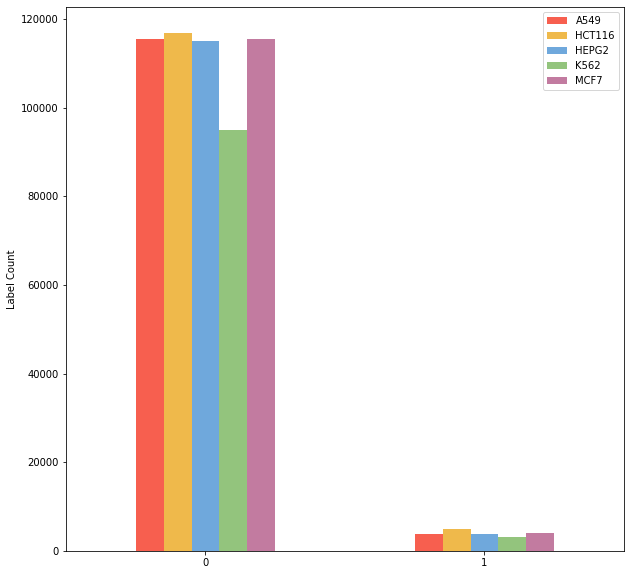

In [51]:
from turtle import width

colour_scheme = {"A549": "#f75f4f", "HCT116": "#efb94b", "HEPG2": "#6fa8dc", "K562": "#93c47d", "MCF7": "#c27ba0ff"}
plot_df.plot(kind = "bar", figsize = (10, 10), color = colour_scheme)

plt.ylabel("Label Count")
plt.gca().xaxis.set_tick_params(rotation = 0)

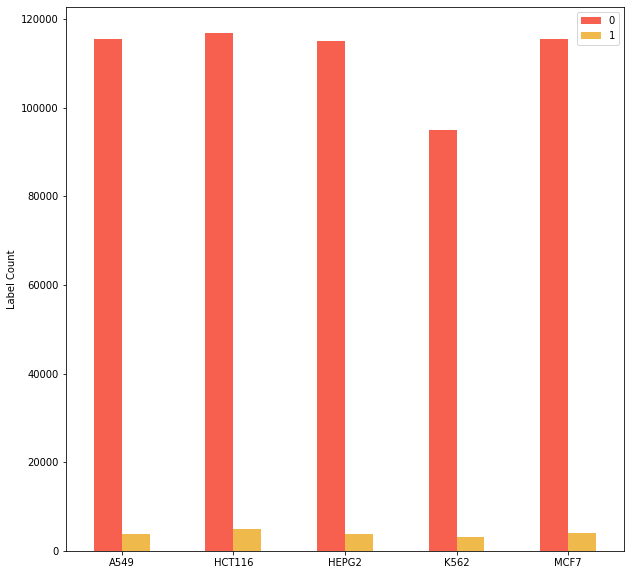

In [58]:
from turtle import width

colour_scheme = {"0": "#f75f4f", "1": "#efb94b"}
plot_df_transpose = plot_df.transpose()
plot_df_transpose.plot(kind = "bar", figsize = (10, 10), color = colour_scheme)

plt.ylabel("Label Count")
plt.gca().xaxis.set_tick_params(rotation = 0)